In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [10]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
covid_data_path = os.path.join(raw_data_path, 'covid-19-data.csv')
covid_df = pd.read_csv(covid_data_path)

In [68]:
covid_df.head()

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1


In [88]:
covid_df[['Country', 'Region']].nunique()

Country    211
Region       6
dtype: int64

In [90]:
#Getting the proportion of countries per region which implies EURO has the highest proportion with about 32% of countries
covid_r = covid_df.Region.value_counts(normalize=True)
covid_r

EURO     0.328205
AMRO     0.213935
AFRO     0.161538
WPRO     0.122074
EMRO     0.111260
SEARO    0.062988
Name: Region, dtype: float64

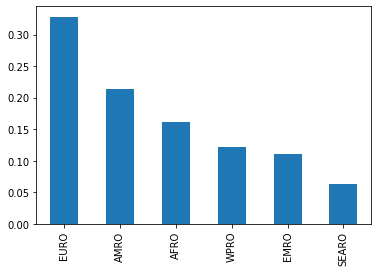

In [91]:
covid_r.plot(kind='bar')

In [28]:
covid_df[['Deaths', 'Confirmed']].describe()

,Deaths,Confirmed
count,9042.000000,9042.000000
mean,14.492037,220.745742
std,101.195444,1481.635096
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.000000
75%,1.000000,33.000000
max,2395.000000,35386.000000


In [78]:
covid_af = covid_df.loc[covid_df['Country'] == 'AF']
covid_af[['Deaths','Confirmed']].describe()

,Deaths,Confirmed
count,53.000000,53.000000
mean,0.547170,14.981132
std,1.084259,23.313491
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.000000
75%,1.000000,29.000000
max,4.000000,110.000000


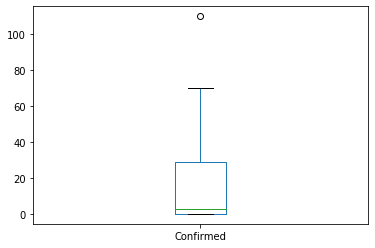

In [81]:
covid_af = covid_df.loc[covid_df['Country'] == 'AF']
covid_af.Confirmed.plot(kind='box')

In [94]:
#Number of Countries in the EMRO Region amounts to 22 Countries
covid_af = covid_df.loc[(covid_df['Region'] == 'EMRO')]
covid_af[['Country', 'Region']].nunique()

Country    22
Region      1
dtype: int64

In [46]:
def summarystats (country, code):
    covid_any = covid_df[covid_df['Country'] == code]
    #return print(country)
    return covid_any[['Deaths', 'Confirmed']].describe(); return print(country)

In [47]:
summarystats('Cameroon', 'AF')

,Deaths,Confirmed
count,53.000000,53.000000
mean,0.547170,14.981132
std,1.084259,23.313491
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,3.000000
75%,1.000000,29.000000
max,4.000000,110.000000
